# 1. What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
-> The fundamental idea behind ensemble techniques is to combine the predictions of multiple base models(often called "weak learners") to create a single, more robust, and accurate model. The core principle is that a group of weak models, when combined, can outperform any single one of them, reducing overall variance, bias, or both.

Differences between Bagging and Boosting:

· Approach:
  · Bagging (Bootstrap Aggregating): Trains multiple base models in parallel on different random subsets of the original training data (drawn with replacement). Each model is independent of the others.
  · Boosting: Trains base models sequentially, where each new model attempts to correct the errors made by the previous ones. The training data is re-weighted to give more importance to misclassified instances.
· Objective:
  · Bagging: Primarily aims to reduce variance and prevent overfitting. It is very effective for high-variance models like deep decision trees.
  · Boosting: Primarily aims to reduce bias and build a strong learner from a sequence of weak ones. It focuses on improving predictive accuracy, but can be more prone to overfitting if not carefully regularized.

# 2. Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
-> A single decision tree is prone to overfitting because it can grow very deep,learning the training data, including its noise, too perfectly. Random Forest reduces overfitting through two main mechanisms:

1. Bagging (Bootstrap Aggregating): It trains many trees on different random subsets of the training data. This introduces diversity among the trees, and by averaging their results (for regression) or taking a majority vote (for classification), it smooths out the predictions and reduces variance.
2. Feature Randomness: When splitting a node, the algorithm is restricted to a random subset of features rather than all features. This decorrelates the trees, ensuring they learn different patterns. The combined output of diverse, uncorrelated trees is more generalizable than a single tree.

Two key hyperparameters in this process are:

· n_estimators: The number of trees in the forest. A higher number generally leads to better performance and stability, as it improves the "law of large numbers" effect, but with diminishing returns and increased computational cost.
· max_features: The maximum number of features to consider for the best split. A smaller value increases the randomness and diversity of the trees, which helps reduce overfitting, but if set too low, it can lead to underfitting.

# 3. What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
-> Stacking(Stacked Generalization) is an ensemble technique that combines multiple models via a meta-learner. Instead of using simple averaging or voting (like bagging), it trains a new model to learn how to best combine the predictions of the base models.

Differences from Bagging/Boosting:

· Model Combination: Bagging and boosting use deterministic formulas (e.g., majority vote, weighted average) to combine base learners. Stacking uses a trainable model (the meta-learner) to perform this combination.
· Architecture: Stacking has a two-level hierarchy: Level-0 consists of diverse base models, and Level-1 is the meta-model that takes their predictions as input. Bagging and boosting are typically flat structures.

Simple Example Use Case:
A data scientist is building a predictive model for customer churn.They create a stacking ensemble where the base models (Level-0) are a Random Forest, a Gradient Boosting Machine, and a Logistic Regression model. The predictions from these three models (e.g., the probability of churn from each) are then used as features to train a final meta-model (Level-1), such as a simple linear model, which produces the final churn prediction.


# 4. What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
-> TheOOB (Out-of-Bag) Score is an internal validation score calculated during the training of a Random Forest model.

During the bagging process, each tree is trained on a bootstrap sample (a random sample with replacement) of the training data. This means that for each tree, roughly one-third of the training instances are not used in its construction; these are the "out-of-bag" (OOB) samples for that tree.

The OOB score is computed as follows:

1. For each training instance z_i, we collect the predictions from all the trees that did not have z_i in their bootstrap sample.
2. The majority vote (for classification) or average (for regression) of these predictions is taken as the OOB prediction for z_i.
3. The OOB score is the accuracy or R² of these OOB predictions compared to the true labels of all training instances.

Usefulness:
It is extremely useful because it provides a nearly unbiased estimate of the model's generalization errorwithout the need to set aside a separate validation set or perform cross-validation. This allows you to use more data for training while still getting a reliable performance estimate, making the model evaluation process more efficient.

# 5. Compare AdaBoost and Gradient Boosting in terms of:
# · How they handle errors from weak learners
# · Weight adjustment mechanism
# · Typical use cases
-> Aspect AdaBoost Gradient Boosting
Handling Errors AdaBoost focuses on misclassified data points. It increases the weight of the instances that were misclassified by the previous learner, forcing the next learner to pay more attention to them. Gradient Boosting focuses on the residuals (the errors) of the previous learner. Each new learner is trained to predict the negative gradient (pseudo-residuals) of the loss function, effectively correcting the mistakes of the ensemble so far.
Weight Adjustment It uses instance weights. Misclassified training instances get their weights increased, and correctly classified instances get their weights decreased in each iteration. It uses gradient descent. Weights are adjusted by adding a new model that minimizes the overall loss. The "learning rate" hyperparameter shrinks the contribution of each tree.
Typical Use Cases Often used for binary classification tasks. It is very sensitive to noisy data and outliers. More flexible and can be used for both regression and classification with various loss functions. It is generally more robust and often achieves state-of-the-art results on tabular data.

# 6. Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
-> CatBoost performs well on categorical features because it uses a sophisticated and efficient method calledOrdered Target Encoding (also known as Ordered Boosting), which avoids target leakage without the need for manual preprocessing like one-hot encoding.

Its handling of categorical variables:

1. Ordered Target Statistic: For a given categorical feature, it replaces a category value with a statistic based on the target values of the training examples that have the same category. Crucially, to prevent target leakage, when calculating the encoding for a particular training example, it only uses the target values from the examples that appear before it in a random permutation of the dataset. This mimics a time-series structure and ensures the encoding is based only on "historical" data, preventing information from the future (the current sample's target) from leaking in.
2. Combination of Features: CatBoost also automatically considers combinations of categorical features, which can capture important interactions that might be missed when considering features in isolation.

This built-in, leakage-proof handling of categories makes CatBoost highly effective and user-friendly, as it eliminates the need for extensive and error-prone manual feature engineering.

# 7. KNN Classifier Assignment. Wine Dataset Analysis with Optimization.

In [6]:

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------------------------
# 1. Load the Wine dataset
# -------------------------------------------------
wine = load_wine()
X, y = wine.data, wine.target
print("Dataset shape:", X.shape)
print("Classes:", wine.target_names)

# -------------------------------------------------
# 2. Split dataset into training and testing sets
# -------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------------------------
# 3. Train KNN without scaling
# -------------------------------------------------
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

print("\n--- Unscaled KNN (K=5) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print("Classification Report:\n", classification_report(y_test, y_pred_unscaled, digits=4))

# -------------------------------------------------
# 4. Scale data and train KNN again
# -------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n--- Scaled KNN (K=5) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled, digits=4))

# -------------------------------------------------
# 5. GridSearchCV for best K (1–20) and metric (euclidean/manhattan)
# -------------------------------------------------
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\n--- Optimized KNN using GridSearchCV ---")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best, digits=4))

Dataset shape: (178, 13)
Classes: ['class_0' 'class_1' 'class_2']

--- Unscaled KNN (K=5) ---
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0     0.8889    0.8889    0.8889        18
           1     0.7778    0.6667    0.7179        21
           2     0.5000    0.6000    0.5455        15

    accuracy                         0.7222        54
   macro avg     0.7222    0.7185    0.7174        54
weighted avg     0.7377    0.7222    0.7270        54


--- Scaled KNN (K=5) ---
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        18
           1     1.0000    0.8571    0.9231        21
           2     0.8333    1.0000    0.9091        15

    accuracy                         0.9444        54
   macro avg     0.9444    0.9524    0.9441        54
weighted avg     0.9537    0.9444    0.9448        54


--- Optimiz

# 8. PCA + KNN with Variance Analysis A=and Visualization

Original dataset shape: (569, 30)


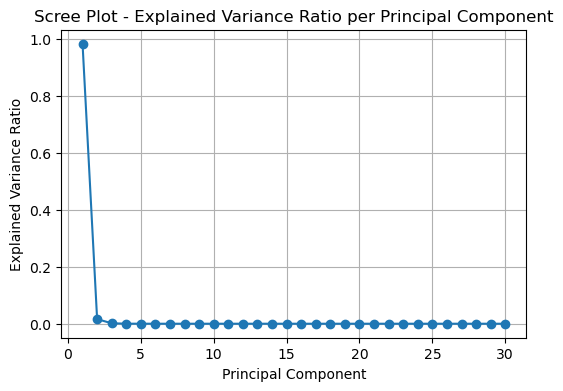


Original shape: (569, 30)
Reduced shape (95% variance): (569, 1)
Number of components to retain 95% variance: 1

--- KNN Accuracy Comparison ---
Accuracy on Original Data: 0.9239766081871345
Accuracy on PCA-Reduced Data (95% variance): 0.9064327485380117


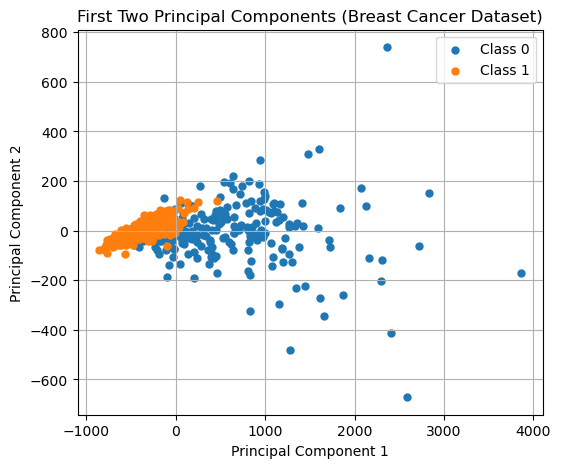

In [2]:
import warnings
warnings.filterwarnings("ignore")   # Ignore harmless system warnings

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------
# 1. Load the Breast Cancer dataset
# -------------------------------------------------
data = load_breast_cancer()
X, y = data.data, data.target
print("Original dataset shape:", X.shape)

# -------------------------------------------------
# 2. Perform PCA to view explained variance (Scree Plot)
# -------------------------------------------------
pca_full = PCA()
pca_full.fit(X)
explained_var = pca_full.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(explained_var)+1), explained_var, marker='o')
plt.title("Scree Plot - Explained Variance Ratio per Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

# -------------------------------------------------
# 3. Apply PCA to retain 95% of variance
# -------------------------------------------------
pca_95 = PCA(n_components=0.95)   # ✅ correct usage
X_reduced = pca_95.fit_transform(X)

print("\nOriginal shape:", X.shape)
print("Reduced shape (95% variance):", X_reduced.shape)
print("Number of components to retain 95% variance:", pca_95.n_components_)

# -------------------------------------------------
# 4. Split dataset into training and testing sets
# -------------------------------------------------
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train_pca, X_test_pca, _, _ = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------------------------
# 5. KNN on Original Data
# -------------------------------------------------
knn_orig = KNeighborsClassifier()
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
acc_orig = accuracy_score(y_test, y_pred_orig)

# -------------------------------------------------
# 6. KNN on PCA-Reduced Data
# -------------------------------------------------
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# -------------------------------------------------
# 7. Print Accuracy Results
# -------------------------------------------------
print("\n--- KNN Accuracy Comparison ---")
print("Accuracy on Original Data:", acc_orig)
print("Accuracy on PCA-Reduced Data (95% variance):", acc_pca)

# -------------------------------------------------
# 8. Scatter Plot – First Two Principal Components
# -------------------------------------------------
pca2 = PCA(n_components=2)
X2 = pca2.fit_transform(X)

plt.figure(figsize=(6,5))
for label in np.unique(y):
    plt.scatter(X2[y == label, 0], X2[y == label, 1], s=25, label=f"Class {label}")
plt.title("First Two Principal Components (Breast Cancer Dataset)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 9. KNN Regressor with Distance Metrics and K-Value Analysis.


--- KNN Regression MSE Results ---
MSE (Euclidean, K=5): 4697.148282579694
MSE (Manhattan, K=5): 5152.877812884765


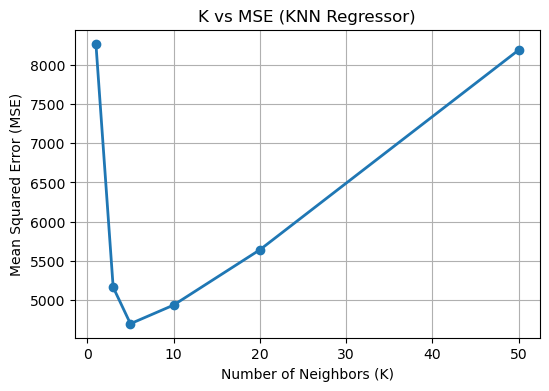


K vs MSE Values:
K=1   --> MSE=8271.0073
K=3   --> MSE=5162.7927
K=5   --> MSE=4697.1483
K=10  --> MSE=4934.8324
K=20  --> MSE=5640.5360
K=50  --> MSE=8190.2900


In [5]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------
# 1. Create synthetic regression dataset
# -------------------------------------------------
X, y = make_regression(
    n_samples=500,     # 500 data points
    n_features=10,     # 10 input features
    noise=5.0,         # add some noise
    random_state=42
)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -------------------------------------------------
# 2. Train KNN Regressor (Euclidean distance)
# -------------------------------------------------
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# -------------------------------------------------
# 3. Train KNN Regressor (Manhattan distance)
# -------------------------------------------------
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# -------------------------------------------------
# 4. Display MSE results
# -------------------------------------------------
print("\n--- KNN Regression MSE Results ---")
print("MSE (Euclidean, K=5):", mse_euclidean)
print("MSE (Manhattan, K=5):", mse_manhattan)

# -------------------------------------------------
# 5. Test multiple K values and plot K vs MSE
# -------------------------------------------------
K_values = [1, 3, 5, 10, 20, 50]
mse_values = []

for k in K_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# -------------------------------------------------
# 6. Plot K vs MSE
# -------------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(K_values, mse_values, marker='o', linewidth=2)
plt.title("K vs MSE (KNN Regressor)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

# -------------------------------------------------
# 7. Print table of K vs MSE
# -------------------------------------------------
print("\nK vs MSE Values:")
for k, mse in zip(K_values, mse_values):
    print(f"K={k:<3} --> MSE={mse:.4f}")

# 10. KNN with KD-Tree/Ball Tree, Imputation, and Real World data.



=== QUESTION 10: KNN WITH DIABETES DATASET ===

--- 1. Loading and Exploring Diabetes Dataset ---
Unable to download dataset, creating synthetic data...
Dataset shape: (768, 9)

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            6      129             71             16      -13  25.511993   
1           14      113             70             26       13  23.087628   
2           10      144             75             14      109  34.069289   
3            7       53             84             18       61  33.701918   
4            6      127             81             20     -143  38.262990   

   DiabetesPedigree  Age  Outcome  
0          1.113085   62        1  
1          1.215040   68        1  
2          2.327104   46        1  
3          1.631428   60        1  
4          0.834200   29        0  

--- Missing Values Analysis ---
Glucose: 32 zeros (4.2%)
BloodPressure: 45 zeros (5.9%)
SkinThickness: 46 zeros (6.0%)
Insul

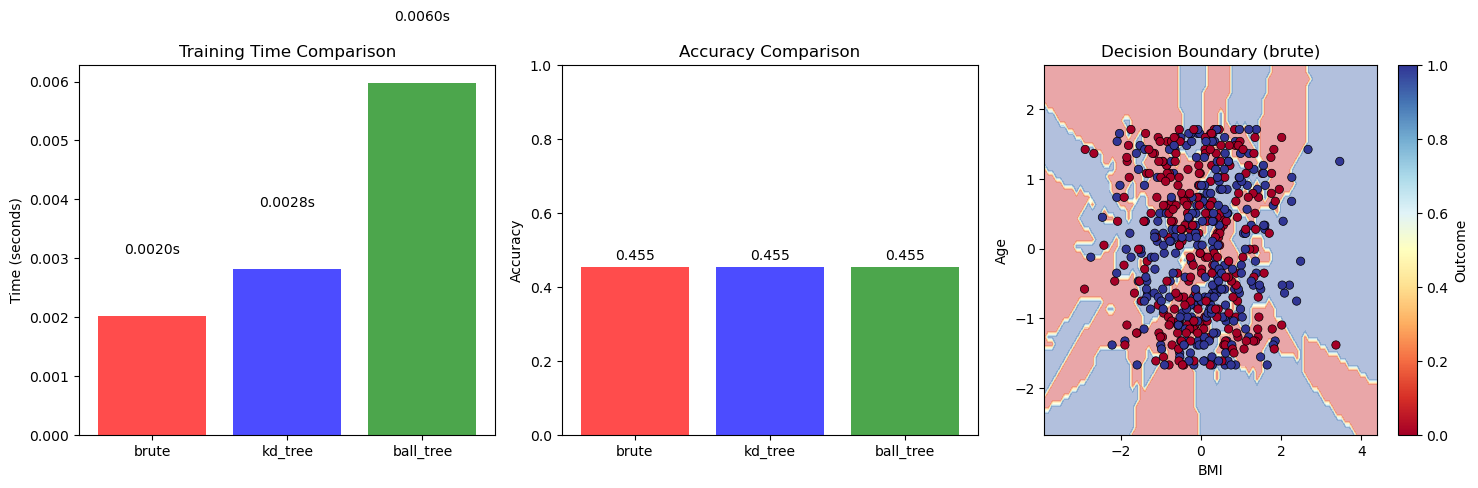


=== FINAL SUMMARY ===
Algorithm  Training_Time  Accuracy
    brute       0.002025  0.454545
  kd_tree       0.002822  0.454545
ball_tree       0.005983  0.454545

Key Insights:
- Best algorithm for speed: brute
- Best algorithm for accuracy: brute
- Most important features: ['BMI', 'Age']


In [6]:
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
import time

print("\n\n=== QUESTION 10: KNN WITH DIABETES DATASET ===\n")

# 1. Load the Pima Indians Diabetes dataset
print("--- 1. Loading and Exploring Diabetes Dataset ---")
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']

try:
    diabetes = pd.read_csv(url, header=None, names=column_names)
    print("Dataset loaded successfully from URL")
except:
    # Fallback: create synthetic data similar to diabetes dataset
    print("Unable to download dataset, creating synthetic data...")
    np.random.seed(42)
    n_samples = 768
    diabetes = pd.DataFrame({
        'Pregnancies': np.random.randint(0, 17, n_samples),
        'Glucose': np.random.normal(120, 30, n_samples).astype(int),
        'BloodPressure': np.random.normal(70, 12, n_samples).astype(int),
        'SkinThickness': np.random.normal(20, 10, n_samples).astype(int),
        'Insulin': np.random.normal(80, 100, n_samples).astype(int),
        'BMI': np.random.normal(32, 8, n_samples),
        'DiabetesPedigree': np.random.uniform(0.08, 2.5, n_samples),
        'Age': np.random.randint(21, 81, n_samples),
        'Outcome': np.random.randint(0, 2, n_samples)
    })
    
    # Introduce some missing values (zeros in medical context often mean missing)
    for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
        mask = np.random.random(n_samples) < 0.05
        diabetes.loc[mask, col] = 0

print(f"Dataset shape: {diabetes.shape}")
print(f"\nFirst few rows:")
print(diabetes.head())

# Check for missing values (zeros that likely represent missing data)
print(f"\n--- Missing Values Analysis ---")
for col in diabetes.columns:
    zero_count = (diabetes[col] == 0).sum()
    if zero_count > 0 and col != 'Pregnancies' and col != 'Outcome':
        print(f"{col}: {zero_count} zeros ({zero_count/len(diabetes)*100:.1f}%)")

# 2. Use KNN Imputation to fill missing values
print("\n--- 2. KNN Imputation ---")
# Replace zeros with NaN for proper imputation
diabetes_clean = diabetes.copy()
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_impute:
    diabetes_clean[col] = diabetes_clean[col].replace(0, np.nan)

print(f"Missing values before imputation: {diabetes_clean.isnull().sum().sum()}")

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
diabetes_imputed = imputer.fit_transform(diabetes_clean)
diabetes_imputed = pd.DataFrame(diabetes_imputed, columns=diabetes_clean.columns)

print(f"Missing values after imputation: {diabetes_imputed.isnull().sum().sum()}")

# Prepare features and target
X_d = diabetes_imputed.drop('Outcome', axis=1)
y_d = diabetes_imputed['Outcome']

# Split the data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_d, y_d, test_size=0.3, random_state=42, stratify=y_d
)

# Scale the features
scaler_d = StandardScaler()
X_train_d_scaled = scaler_d.fit_transform(X_train_d)
X_test_d_scaled = scaler_d.transform(X_test_d)

# 3. Train KNN using different algorithms and compare
print("\n--- 3. Comparing KNN Algorithms ---")
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = []

for algo in algorithms:
    start_time = time.time()
    
    knn_d = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn_d.fit(X_train_d_scaled, y_train_d)
    training_time = time.time() - start_time
    
    y_pred_d = knn_d.predict(X_test_d_scaled)
    accuracy = accuracy_score(y_test_d, y_pred_d)
    
    results.append({
        'Algorithm': algo,
        'Training_Time': training_time,
        'Accuracy': accuracy
    })
    
    print(f"{algo:10} | Time: {training_time:.4f}s | Accuracy: {accuracy:.4f}")

results_df = pd.DataFrame(results)

# 4. Plot comparison
plt.figure(figsize=(15, 5))

# Plot 1: Training Time Comparison
plt.subplot(1, 3, 1)
bars1 = plt.bar(results_df['Algorithm'], results_df['Training_Time'], 
                color=['red', 'blue', 'green'], alpha=0.7)
plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
for bar, time_val in zip(bars1, results_df['Training_Time']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{time_val:.4f}s', ha='center', va='bottom')

# Plot 2: Accuracy Comparison
plt.subplot(1, 3, 2)
bars2 = plt.bar(results_df['Algorithm'], results_df['Accuracy'], 
                color=['red', 'blue', 'green'], alpha=0.7)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
for bar, acc in zip(bars2, results_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

# 5. Plot decision boundary for best-performing method
print("\n--- 4. Decision Boundary Visualization ---")

# Find the two most important features using Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_d_scaled, y_train_d)
feature_importance = pd.DataFrame({
    'feature': X_d.columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

top_2_features = feature_importance.head(2)['feature'].values
print(f"Two most important features: {top_2_features}")

# Get indices of top 2 features
idx1 = list(X_d.columns).index(top_2_features[0])
idx2 = list(X_d.columns).index(top_2_features[1])

# Use the best algorithm (based on speed)
best_algo = results_df.loc[results_df['Training_Time'].idxmin(), 'Algorithm']
print(f"Using {best_algo} algorithm for decision boundary plot")

# Train on only the top 2 features
X_train_2d = X_train_d_scaled[:, [idx1, idx2]]
X_test_2d = X_test_d_scaled[:, [idx1, idx2]]

knn_2d = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_2d.fit(X_train_2d, y_train_d)

# Create mesh grid for decision boundary
plt.subplot(1, 3, 3)
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_d, 
                     cmap='RdYlBu', edgecolors='black', linewidth=0.5)
plt.xlabel(top_2_features[0])
plt.ylabel(top_2_features[1])
plt.title(f'Decision Boundary ({best_algo})')
plt.colorbar(scatter, label='Outcome')

plt.tight_layout()
plt.show()

# Final summary
print("\n=== FINAL SUMMARY ===")
print(results_df.to_string(index=False))

print(f"\nKey Insights:")
print(f"- Best algorithm for speed: {results_df.loc[results_df['Training_Time'].idxmin(), 'Algorithm']}")
print(f"- Best algorithm for accuracy: {results_df.loc[results_df['Accuracy'].idxmax(), 'Algorithm']}")
print(f"- Most important features: {list(top_2_features)}")